# Assignment #1                                    20200045 Kimgeonwoo
- Fill in the blank cells below.
- Submit this notebook file via KLMS
- Due date : 2022.09.25 09:00am
    * after due date, submission is still allowed after due date.
        * with delay penalty of 20% / day
        * actual score = original score before penalty * (100% - delay penalty)
        * submission will be closed after 4 days of due date (2022.09.29 9am)

## Questions on stock return
Please approach this assignments with the following question in mind.  
- __Q1__. How can we measure the return on investment of stock?    
    * return<br>
<br>
- __Q2__. Which business day of the week is best for buying stocks?  Or are they indifferent?    
    * business day of the week : Monday, Tuesday, ... , Friday
    * no stock price data on weekends (Saturday, Sunday)<br>
<br>
- __Q3__. Are stock returns independent or correlated?
    * Correlation coefficient<br>
<br>
- __Q4__. If you are a risk taker, which stock would you buy?
    * risk taker : a person who prefers high risk high return stock
    * cf. risk averse
    * cf. risk neutral<br>

This assignment will guide you to answer these questions.

In [65]:
%pip install finance-datareader
%pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Task 0. Select stocks and download price data

#### Task 0-1. Download stock price data
- $S = \{s_1, s_2, ..., s_5\}$ : set of stocks
    * Select 5 stocks that you would like to investigate
- Download price data of $S$ from internet using FinanceDataReader
    * start data : ``2016-09-01``
    * end data : ``2022-08-31``
- Make a DataFrame object ``df`` having closing price of all stocks in $S$
- Display the first 5 rows of ``df``
    * hint : df.head()  
![image.png](attachment:cb552c75-d8b2-4e54-bbb0-218b51b955a6.png)

In [67]:
# fill in this cell for Task 0-1
# set of stocks = {samsung, cj, korean air, sm, showbox}
df1 = fdr.DataReader('005930', start='2016-09-01', end='2022-08-31') #samsung
samsung = df1['Close']
df2 = fdr.DataReader('001040', start='2016-09-01', end='2022-08-31') #cj
cj = df2['Close']
df3 = fdr.DataReader('003490', start='2016-09-01', end='2022-08-31') #korean air
koair = df3['Close']
df4 = fdr.DataReader('063440', start='2016-09-01', end='2022-08-31') #sm
sm = df4['Close']
df5 = fdr.DataReader('086980', start='2016-09-01', end='2022-08-31') #showbox
showbox = df5['Close']

df = pd.DataFrame({'samsung':samsung, 'cj':cj, 'koair':koair, 'sm':sm, 'showbox':showbox})
df.head()

,samsung,cj,koair,sm,showbox
Date,,,,,
2016-09-01,31740,177278,21062,1920,6650
2016-09-02,31940,178221,21337,2000,6730
2016-09-05,32120,178692,20909,1940,6700
2016-09-06,32860,178692,20636,1895,6720
2016-09-07,32420,175863,20574,1840,6560


#### Task 0-2. Write to csv file and read back from it
- Save ``df`` to a csv file "stock_data.csv"
- Read back ``df`` from the saved csv file "stock_data.csv"
    * by reading the stored csv file, you can continue the following tasks even if you have no internet connection
    * use pd.read_csv
        * index_col = 'Date'
        * parse_dates = True : for recognizing date
- Display the first 5 rows of ``df``

In [68]:
# fill in this cell for Task 0-2
df.to_csv('stock_data.csv')

df = pd.read_csv('stock_data.csv', index_col='Date',parse_dates = True)

df.head()

,samsung,cj,koair,sm,showbox
Date,,,,,
2016-09-01,31740,177278,21062,1920,6650
2016-09-02,31940,178221,21337,2000,6730
2016-09-05,32120,178692,20909,1940,6700
2016-09-06,32860,178692,20636,1895,6720
2016-09-07,32420,175863,20574,1840,6560


### Task 1 : __return__ of a stock

#### Task 1-1. Plot monthly average price.
- Choose one stock  $s \in S$ 
- Compute monthly mean price of $s$
    * use resample
- Plot monthly mean price as below
    * plt.title('title string here')

![image.png](attachment:32f0fb96-7e05-4249-b0ba-fa78ba0ee6f6.png)

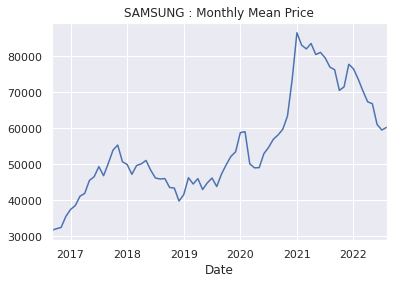

In [69]:
# fill in this cell for Task 1-1
# choose samsung
samsungM = samsung.resample('M').mean()
samsungM.plot(style=['-', ':', '--'])
plt.title('SAMSUNG : Monthly Mean Price');


#### Task 1-2. Computing __return__ of stocks.
- Compute daily return $R^{(s)}_t$ for $\forall s \in S$ 
    * __return__ $R^{(s)}_t$ is defined as $R^{(s)}_t = \frac{P^{(s)}_t - P^{(s)}_{t-1}}{P^{(s)}_{t-1}} \times 100(\%) $
    * __price__ $P_t^{(s)}$ : closing price of $s \in S$ at time $t$
    * hint : consider using df.shift(1) for $P_{t-1}$
- Compute minimum and maximum of return for each stock
    * hint : use min() and max()
- Store minimum and maximum of return as a DataFrame object and display it as below.
|      |        min |      max  |
|------|------------|-----------|
| AAPL | -12.865160 | 11.972285 |
| NVDA | -18.754941 | 29.811098 |
| TSLA | -21.062823 | 19.898547 |
| NEE  | -13.414028 | 13.697423 |
| ALB  | -15.560689 | 13.738128 |  

In [71]:
# fill in this cell for Task 1-2
dfsamsung = pd.DataFrame({'samsung':samsung})
samsung_yesterday = samsung.shift(1)
dfsamsung = pd.DataFrame({'samsung':samsung, 'samsung_yesterday':samsung_yesterday})
dfsamsung['return'] = (dfsamsung['samsung']-dfsamsung['samsung_yesterday'])/dfsamsung['samsung_yesterday']*100

dfcj = pd.DataFrame({'cj':cj})
cj_yesterday = cj.shift(1)
dfcj = pd.DataFrame({'cj':cj, 'cj_yesterday':cj_yesterday})
dfcj['return'] = (dfcj['cj']-dfcj['cj_yesterday'])/dfcj['cj_yesterday']*100

dfkoair = pd.DataFrame({'koair':koair})
koair_yesterday = koair.shift(1)
dfkoair = pd.DataFrame({'koair':koair, 'koair_yesterday':koair_yesterday})
dfkoair['return'] = (dfkoair['koair']-dfkoair['koair_yesterday'])/dfkoair['koair_yesterday']*100

dfsm = pd.DataFrame({'sm':sm})
sm_yesterday = sm.shift(1)
dfsm = pd.DataFrame({'sm':sm, 'sm_yesterday':sm_yesterday})
dfsm['return'] = (dfsm['sm']-dfsm['sm_yesterday'])/dfsm['sm_yesterday']*100

dfshowbox = pd.DataFrame({'showbox':showbox})
showbox_yesterday = showbox.shift(1)
dfshowbox = pd.DataFrame({'showbox':showbox, 'showbox_yesterday':showbox_yesterday})
dfshowbox['return'] = (dfshowbox['showbox']-dfshowbox['showbox_yesterday'])/dfshowbox['showbox_yesterday']*100

min_dict = {'samsung':dfsamsung['return'].min(), 'cj':dfcj['return'].min(), 'koair':dfkoair['return'].min(), 'sm':dfsm['return'].min(), 'showbox':dfshowbox['return'].min() }
max_dict = {'samsung':dfsamsung['return'].max(), 'cj':dfcj['return'].max(), 'koair':dfkoair['return'].max(), 'sm':dfsm['return'].max(), 'showbox':dfshowbox['return'].max() }

min_series = pd.Series(min_dict)
max_series = pd.Series(max_dict)
minmaxdf = pd.DataFrame({'min': min_series,'max': max_series})
print(minmaxdf)

               min        max
samsung  -8.035714  10.470588
cj       -9.344262  14.783821
koair   -24.855147  15.657448
sm      -24.125000  30.000000
showbox -19.743590  29.971182


### Task 2 : mean __return__ for each day of the week
#### Task 2-1. Computing mean __return__ for each day of the week.
- Compute mean return for each day of the week
    * hint : use groupby
- Plot mean return for each day of the week as below.

![image.png](attachment:04636697-d01a-433f-95a7-3146a46fd294.png)

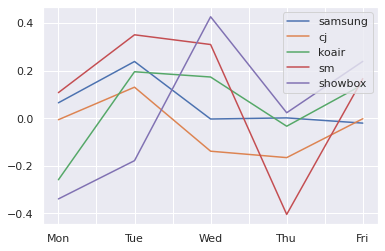

In [82]:
# fill in this cell for Task 2-1

return_df = pd.DataFrame({'samsung':dfsamsung['return'], 'cj':dfcj['return'], 'koair':dfkoair['return'],'sm':dfsm['return'],'showbox':dfshowbox['return']})
by_eachday = return_df.groupby(return_df.index.dayofweek).mean()
by_eachday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

by_eachday.plot();
plt.legend(loc='upper right')
plt.show()

#### Task 2-2. When to buy stocks?
- Based on the previous task result, which day of the week is best for buying stocks?  
    * When is worst?
- Briefly state your opinion in the next blank cell with some justification.

##### Write your opinion and justification here (Task 2-2).

Tuesday's return value is the highest, so we have to buy it on Monday.
Thursday's return value is the lowest, so we shouldn't buy it on Wednesday.

<br>
<br>
<br>
<br>
<br>
<br>
<br>  

### Task 3 : Analysis of Return
Some basic statistical terms on data $X = \{X_t;t=1..n\}$ and $Y = \{Y_t;t=1..n\}$
- $\bar{X}$ = $mean(X)$ = $\frac1{n}\sum_{t=1}^{n} X_t$ : 
- $var(X) = \frac1{n}\sum_{t=1}^{n} {(X_t-\bar{X})^2}$ : variance
- $std(X) = \sqrt{var(X)}$ : standard deviation
- $cov(X,Y) = \frac1{n}\sum_{t=1}^{n} {(X_t-\bar{X})(Y_t-\bar{Y})}$ : covariance
- $corr(X,Y) = \frac{cov(X,Y)}{std(X)std(Y)}$ : Pearson correlation coef.
    * $ -1 \leq corr(X,Y) \leq +1$


#### Task 3-1. Correlation matrix
- compute daily return of each stock in $S$
    * already done in Task 1-2
- compute correlation matrix between daily returns
    * hint : corr() function of DataFrame
- plot heatmap as below example
    * make your plot have the same style as the example
    * hint : use seaborn.heatmap() with cmap = 'RdYlBu_r'       

![image.png](attachment:5bf3d670-13c2-4e4e-bd4a-e894791715af.png)

          samsung        cj     koair        sm   showbox
samsung  1.000000  0.310464  0.322685  0.157715  0.208711
cj       0.310464  1.000000  0.402296  0.222026  0.301217
koair    0.322685  0.402296  1.000000  0.185245  0.308953
sm       0.157715  0.222026  0.185245  1.000000  0.297881
showbox  0.208711  0.301217  0.308953  0.297881  1.000000


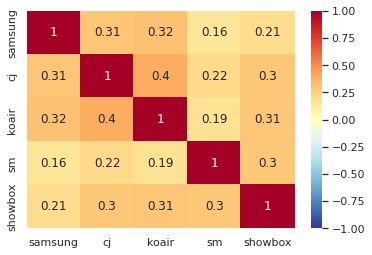

In [84]:
# fill in this cell for Task 3-1
corr=return_df.corr()
print(corr)
sns.heatmap(corr,cmap='RdYlBu_r',annot=True, vmin=-1, vmax=1);


#### Task 3-2. Most/least correlated pairs
- find the most correlated pair and print as below  
Most  correlated pair : ('AAPL', 'NVDA'), Corr=0.58  
- find the least correlated pair and print as below  
Least correlated pair : ('TSLA', 'NEE'), Corr=0.21

In [85]:
# fill in this cell for Task 3-2

recorr=corr.replace(1,np.nan)

max_corr_value=recorr.max().max()
min_corr_value=recorr.min().min()

find_max_pos=recorr.isin([max_corr_value])
find_min_pos=recorr.isin([min_corr_value])


find_max_pos = find_max_pos.any()
max_pos = tuple(find_max_pos[find_max_pos == True].index)
find_min_pos = find_min_pos.any()
min_pos = tuple(find_min_pos[find_min_pos == True].index)

print ('Most correlated pair :', max_pos, 'Corr=', round(max_corr_value,2))
print ('Least correlated pair :', min_pos, 'Corr=', round(min_corr_value,2))

Most correlated pair : ('cj', 'koair') Corr= 0.4
Least correlated pair : ('samsung', 'sm') Corr= 0.16


### Task 4 : Characterizing stocks
- Each stock can be characterized by:
    * expected return level ($\mu$) : mean of daily return
    * risk ($\sigma$) : standard deviation of daily return

#### Task 4-1. 
- Compute mean return ($\mu^{(s)}$) for $\forall s \in S$
    * use mean() function of DataFrame
- Compute standard deviation of return ($\sigma^{(s)}$) for $\forall s \in S$
    * use std() function of DataFrame
- Plot $\{\left(\mu^{(s)}, \sigma^{(s)}\right); s\in S\}$
    * hint : use plt.scatter(), plt.annotate(), plt.xlabel(), plt.ylabel()

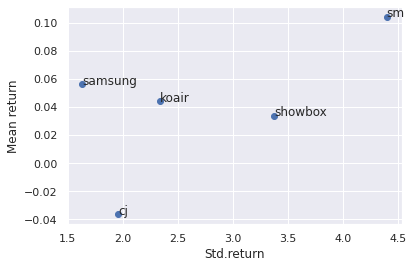

In [86]:
# fill in this cell for Task 4-1
mean_df = return_df.mean()
std_df = return_df.std()
plt.scatter(std_df,mean_df)
for i in range (5):
    plt.annotate(mean_df.keys()[i],xy=(std_df[i], mean_df[i]))

plt.xlabel('Std.return')
plt.ylabel('Mean return')

plt.show()


#### Task 4-2. If you are a risk taker, which stock $s \in S$ would you invest on?
- Choose a stock $s \in S$ for risk taker
    * Briefly justify your answer.

##### Write your opinion and justification here (Task 4-2).
<br>If I take a risk, I'll buy the stock with the highest maen_return value (in my case, It is sm).
The high std_return means that the risk is high, but investors who take risks will invest in stocks with the highest return(mean_return) even if the risk is high.
<br>
<br>
<br>
<br>
<br>
<br>  

#### Task 4-3. Which stock $s \in S$ would you never invest on, regardless of your risk appetite?  
- Choose a stock $s \in S$ that you would not invest on..
    * Explain why.
    * hint : look for a stock dominated by others

##### Write your opinion and explain your reason here (Task 4-3).
<br>I will never invest in stocks with negative mean_return values (in my case, cj. Unfortunately, I already have cj shares.)
Regardless of the risk, the meaning_return is negative means it usually losing money. Even in general cases where there are no unfavorable or favorable factors for stocks, I lose money.
<br>
<br>
<br>
<br>
<br>
<br>  